In [2]:
!pip install -U --user transformers tensorflow torch==1.4.0+cpu torchvision==0.5.0+cpu -f https://download.pytorch.org/whl/torch_stable.html 

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: transformers in c:\programdata\anaconda3\lib\site-packages (2.4.1)
Requirement already up-to-date: tensorflow in c:\users\szwang\appdata\roaming\python\python37\site-packages (2.1.0)
  Using cached https://download.pytorch.org/whl/cpu/torch-1.4.0%2Bcpu-cp37-cp37m-win_amd64.whl
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.5.0%2Bcpu-cp37-cp37m-win_amd64.whl


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [37]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
import torch
from tensorflow.keras.layers import *
from transformers import TFBertModel, TFBertForPreTraining, BertTokenizer, TFBertForSequenceClassification, BertConfig, glue_convert_examples_to_features, glue_processors
print(tf.__version__, torch.__version__)

2.1.0 1.4.0+cpu


Convert TF to PT:
(base) D:\python\LEO_TM\BERT_chinese_LM_processing\Data\NSL_POC\pretrained\trans
formers-master>python transformers-cli convert --model_type bert --tf_checkpoint
 ../pretrained_output/model.ckpt-0  --config ../pretrained_output/config.json --
pytorch_dump_output ../pretrained_output/pytorch_model.bin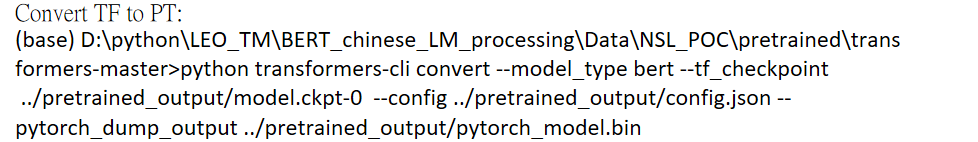

In [4]:
data_dir = '../Data/NSL_POC/'
train_df = pickle.load(open(data_dir+'clf_train.pkl','rb'))
train_df

pretrained   Label
0   金管保壽字第10502548153號核釋「保險業辦理國外投資管理辦法」第15條第9項規定，有...      AT
1   金管保財字第10502505671號修正「保險業財務報告編製準則」部分條文及第19條格式1、...     F&A
2   金管保綜字第10602560561號修正「保險業防制洗錢及打擊資助恐怖主義注意事項」，並修正...  OTHERS
3   金管證發字第1060001296號修正「公開發行公司取得或處分資產處理準則」部分條文。一、明...      GA
4   金管保財字10500909790准予備查「保險業風險管理實務守則」為強化保險業風險控管，並配...      RM
5   金管保財字第10610908021號核釋保險業資金辦理專案運用投資屬「保險業資金辦理專案運用...     ISD
6   金管保壽字第10610908141號函核復「保險業承保身心障礙者處理原則」一、為避免身心障礙...      UW
7   金管保財字第10610908021號令修正「保險業辦理再保險分出分入及其他危險分散機制管理辦...      AT
8   金管保產字第10502121090號函「保險業公司治理實務守則」部分條文修正草案，請依說明修...     SEC
9   金管保壽字第10602542301號令修正「保險業授權代收保險費應注意事項」，自即日生效。一...      PC
10  金管保財字第10602502521號令修正「保險業辦理國外投資管理辦法」部分條文及第15條附...      AI
11  勞動條3字第1060131269號令修正「勞動基準法施行細則」部分條文。因勞動基準法（以下簡...      HR
12  金管銀法字第10610003100號令訂定「金融機構防制洗錢辦法」。一、授權依據（第1條）二...      UW
13  金管保綜字第10602562471號令修正「保險業防制洗錢及打擊資恐注意事項」，並將名稱修正...     SEC
14  金管保財字第10602064071號令訂定保險業計算自有資本及風險資本之範圍及計算公式一、訂...      AT
15  金管保財字第10602503031號令修正「保險業與利害關係人從事放款以外之其他交易管理辦法...      AI
16  金管保財字第10602503271號修正「人身保險及財產保險安定基金計提標準」第2條、第3條...      AT
17  金管證發字第1060027112號修正「公開發行公司審計委員會行使職權辦法」部分條文、「公開...     SEC
18  金管保綜字第10602562991號、台央外拾壹字第1060032701號令修正「國際保險業...     OIU
19  金管保壽字第10602544311號修正「保險業設立遷移或裁撤分支機構管理辦法」部分條文。為...     SEC
20  金管保財字第10602502861號修正「保險業財務報告編製準則」部分條文及第19條格式1至...     F&A
21  金管保財字第10602503581號修正「保險業從事衍生性金融商品交易管理辦法」第13條、第...     ISD
22  金管保壽字第10602544381號修正「投資型保險商品銷售應注意事項」第4點規定，自106...      PD
23  金管保財字第10602104511號核釋「保險業資金辦理專案運用公共及社會福利事業投資管理辦...      AI
24  金管保財字第10602504021號修正「保險業內部控制及稽核制度實施辦法」。為提高保險業對...      RM
25  金管保壽字第10602546201號修正「保險商品銷售前程序作業準則」第24條、第32條條文...      AA
26  台財稅字第10604676280號修正「營利事業所得稅不合常規移轉訂價查核準則」部分條文。為...     F&A
27  勞職授字第1060204871號修正「勞工健康保護規則」。配合職業安全衛生法（以下簡稱本法）...      HR
28  金管保壽字第10610946061號修正「人身保險商品審查應注意事項」第220點之3規定，自...      PD
29  台財際字第10624518960號訂定金融機構執行共同申報及盡職審查作業辦法。為因應國際日益...     POS
30  金管保綜字第 10602564481 號修正「保險業辦理電子商務應注意事項」，自即日生效。金...      CU
31  壽會貴字第1061116492號修正「人壽保險業防制洗錢及打擊資助恐怖主義注意事項範本」、「...  OTHERS
32  金管保財字第10602505441號修正人身保險業各幣別(新臺幣、美元、澳幣、歐元及人民幣)...    ILPD
33  金管保財字第10602137571號訂定106年度適用「保險業計算自有資本及風險資本之範圍及...      AT
34  金管保壽字第10610949581號修正「人身保險業辦理以外幣收付之非投資型人身保險業務應具...      PD

In [5]:
labelID_dict = {}
for i,label in enumerate(set(train_df.Label.tolist())):
    labelID_dict[label] = i
# pickle.dump(obj=labelID_dict,file=open(data_dir+'labelID_dict.pkl','wb'))
labelID_dict = pickle.load(open(data_dir+'labelID_dict.pkl','rb'))
print(labelID_dict)

{'AA': 0, 'UW': 1, 'HR': 2, 'POS': 3, 'ILPD': 4, 'CU': 5, 'AT': 6, 'PC': 7, 'OIU': 8, 'SEC': 9, 'AI': 10, 'OTHERS': 11, 'RM': 12, 'ISD': 13, 'GA': 14, 'F&A': 15, 'PD': 16}


In [51]:
trainX = train_df.pretrained.tolist()
trainY = train_df.Label.tolist()
train_Y = np.array([labelID_dict[x] for x in trainY])
print(train_Y.shape)
assert len(trainX) == len(train_Y)

(35,)


In [46]:
model_dir = '../Data/NSL_POC/pretrained/pretrained_output/'

# 'hfl/chinese-roberta-wwm-ext'
config = BertConfig.from_pretrained(model_dir+'config.json',num_labels=len(labelID_dict)) # model_dir+'config.json' from_pretrained , num_labels=len(labelID_dict)
config.output_hidden_states=True
tokenizer = BertTokenizer.from_pretrained(model_dir) #model_dir
model = TFBertForSequenceClassification.from_pretrained(model_dir+'pytorch_model.bin', config=config, from_pt=True)
# model = TFBertModel.from_pretrained(model_dir+'pytorch_model.bin', from_pt=True, config=config) # BertModel
# model = Dense(17,activation='softmax')(model)
# model.add(Dense(17,activation='softmax'))
model.summary()

Model: "tf_bert_for_sequence_classification_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  102267648 
_________________________________________________________________
dropout_337 (Dropout)        multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  13073     
Total params: 102,280,721
Trainable params: 102,280,721
Non-trainable params: 0
_________________________________________________________________


In [12]:
train_X = tokenizer.encode(trainX[0])

In [21]:
len(train_X[:512])

512

In [18]:
train_X[3]

924

In [49]:
input_ids = tf.constant(tokenizer.encode(trainX[0], add_special_tokens=True))[None, 1:513]
model(input_ids)

(<tf.Tensor: shape=(1, 17), dtype=float32, numpy=
 array([[ 0.01979528,  0.34427196, -0.07014667, -0.49727052,  0.57606685,
         -0.01535538,  0.11430933, -0.0450023 ,  0.68704015, -0.08569238,
          0.21343467,  0.01042967, -0.5044156 , -0.427587  , -0.1773215 ,
          0.00199722, -0.17278355]], dtype=float32)>,
 (<tf.Tensor: shape=(1, 512, 768), dtype=float32, numpy=
  array([[[-0.55435586, -0.09462756, -0.33222687, ..., -0.44140595,
            0.3520794 ,  0.04826862],
          [-0.6998284 , -0.22304885, -0.8071961 , ..., -0.45862633,
           -0.8025322 , -0.4225585 ],
          [ 0.21913224, -0.46671164, -0.51223063, ..., -0.10547557,
           -0.11612163,  0.43877235],
          ...,
          [-0.41762987, -0.45228168,  0.42033008, ..., -0.00431474,
           -0.24653646, -1.0576246 ],
          [-0.842303  , -0.00665954, -1.3898928 , ...,  0.31176844,
           -0.29549506, -0.26446968],
          [-0.93622047,  1.0965811 , -0.55757797, ...,  0.36564434,
    

In [48]:
input_ids

<tf.Tensor: shape=(1, 512), dtype=int32, numpy=
array([[ 101, 7032, 5052,  924, 1904, 2099, 5018, 8423, 8904, 9488, 9313,
        9310, 5998, 3417, 7026,  519,  924, 7402, 3511, 6794, 4415, 1751,
        1912, 2832, 6536, 5052, 4415, 6794, 3791,  520, 5018, 8115, 3454,
        5018,  130, 7517, 6211, 2137, 8024, 3300, 7302,  782, 6716,  924,
        7402, 3511, 3297, 6818,  671, 2399,  722, 1555, 1501, 5178, 3539,
        5198, 1394, 6268, 1146,  966, 5016, 1394, 2792, 1154, 3560, 3976,
         722,  671, 5442, 8024, 2533, 3079,  671, 6900, 4500, 3315, 6794,
        3791, 5018, 8115, 3454, 5018,  130, 7517, 5018,  122, 3621, 2772,
        5018,  123, 3621, 2792, 1154, 2974, 3177, 4685, 7302, 6211, 2137,
        8024, 5632, 8438, 2399,  122, 3299,  122, 3189, 4495, 3126,  511,
         671,  510,  898, 3087,  924, 7402, 3511, 6794, 4415, 1751, 1912,
        2832, 6536, 5052, 4415, 6794, 3791, 8020,  809,  678, 5080, 4935,
        3315, 6794, 3791, 8021, 5018, 1282,  758, 3454, 5018,  7

In [45]:
input_ids #new

<tf.Tensor: shape=(1, 512), dtype=int32, numpy=
array([[ 101, 7032, 5052,  924, 1904, 2099, 5018, 8423, 8904, 9488, 9313,
        9310, 5998, 3417, 7026,  519,  924, 7402, 3511, 6794, 4415, 1751,
        1912, 2832, 6536, 5052, 4415, 6794, 3791,  520, 5018, 8115, 3454,
        5018,  130, 7517, 6211, 2137, 8024, 3300, 7302,  782, 6716,  924,
        7402, 3511, 3297, 6818,  671, 2399,  722, 1555, 1501, 5178, 3539,
        5198, 1394, 6268, 1146,  966, 5016, 1394, 2792, 1154, 3560, 3976,
         722,  671, 5442, 8024, 2533, 3079,  671, 6900, 4500, 3315, 6794,
        3791, 5018, 8115, 3454, 5018,  130, 7517, 5018,  122, 3621, 2772,
        5018,  123, 3621, 2792, 1154, 2974, 3177, 4685, 7302, 6211, 2137,
        8024, 5632, 8438, 2399,  122, 3299,  122, 3189, 4495, 3126,  511,
         671,  510,  898, 3087,  924, 7402, 3511, 6794, 4415, 1751, 1912,
        2832, 6536, 5052, 4415, 6794, 3791, 8020,  809,  678, 5080, 4935,
        3315, 6794, 3791, 8021, 5018, 1282,  758, 3454, 5018,  7

Play ground

In [6]:
!pip install tensorflow-datasets transformers tensorflow

  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78598 sha256=fa60f0e28150eb6aebafb0f03c3a37fe8401e8fca8cc5829d319b9428aa346e5
  Stored in directory: C:\Users\szwang\AppData\Local\pip\Cache\wheels\59\b1\91\f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
  Created wheel for promise: filename=promise-2.3-cp37-none-any.whl size=21500 sha256=945651077f8c79912f94fcee5eaadb0c5b500236500321a5435e0f02a1ef8d50
  Stored in directory: C:\Users\szwang\AppData\Local\pip\Cache\wheels\19\49\34\c3c1e78bcb954c49e5ec0d31784fe63d14d427f316b12fbde9
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp37-none-any.whl size=884633 sha256=5c7de5168fae7eac819c532e0bf9a781b96c33add2d35c47fa96bc5c110832e6
  Stored in directory: C:\Users\szwang\AppData\Local\pip\Cache\wheels\6d\ec\1a\21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
  Created wheel for googleapis-common-protos: filename=googleapis_common_protos-1.51.0-cp37-none-any.whl size=77603 sha256=061cf77ad0a1803015e79712da

In [ ]:
# tensorflow 

In [7]:
import os
import tensorflow as tf
import tensorflow_datasets
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig, glue_convert_examples_to_features, glue_processors

In [8]:
# script parameters
BATCH_SIZE = 32
EVAL_BATCH_SIZE = BATCH_SIZE * 2
EPOCHS = 3

TASK = "sst-2"

if TASK == "sst-2":
    TFDS_TASK = "sst2"
elif TASK == "sts-b":
    TFDS_TASK = "stsb"
else:
    TFDS_TASK = TASK

In [9]:
num_labels = len(glue_processors[TASK]().get_labels())
print(num_labels)

2


In [18]:
data, info = tensorflow_datasets.load(f'glue/{TFDS_TASK}',in_memory=True, data_dir='D:/python/LEO_TM/BERT_chinese_LM_processing/Model/tfds',with_info=True)
train_dataset = glue_convert_examples_to_features(data['train'], tokenizer, 128, TASK)


INFO:absl:Load pre-computed datasetinfo (eg: splits) from bucket.
INFO:absl:Loading info from GCS for glue/sst2/1.0.0
INFO:absl:Field info.description from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.location from disk and from code do not match. Keeping the one from code.
INFO:absl:Generating dataset glue (D:/python/LEO_TM/BERT_chinese_LM_processing/Model/tfds\glue\sst2\1.0.0)


INFO:absl:URL https://firebasestorage.googleapis.com/v0/b/mtl-sentence-representations.appspot.com/o/data%2FSST-2.zip?alt=media&token=aabc5f6b-e466-44a2-b9b4-cf6337f84ac8 already downloaded: reusing D:/python/LEO_TM/BERT_chinese_LM_processing/Model/tfds\downloads\fire.goog.com_v0_b_mtl-sent-repr.apps.co1n4W-1VznBsyzc6Yd1ltscEn3DItk8CCKB9kBXwW3qo.zipalt=media&token=aabc5f6b-e466-44a2-b9b4-cf6337f84ac8.


ExtractError: Error while extracting D:/python/LEO_TM/BERT_chinese_LM_processing/Model/tfds\downloads\fire.goog.com_v0_b_mtl-sent-repr.apps.co1n4W-1VznBsyzc6Yd1ltscEn3DItk8CCKB9kBXwW3qo.zipalt=media&token=aabc5f6b-e466-44a2-b9b4-cf6337f84ac8 to D:/python/LEO_TM/BERT_chinese_LM_processing/Model/tfds\downloads\extracted\ZIP.fire.goog.com_v0_b_mtl-sent-repr.apps.co1n4W-1VznBsyzc6Yd1ltscEn3DItk8CCKB9kBXwW3qo.zipalt=media&token=aabc5f6b-e466-44a2-b9b4-cf6337f84ac8 (file: SST-2) : Failed to create a directory: D:/python/LEO_TM/BERT_chinese_LM_processing/Model/tfds\downloads\extracted\ZIP.fire.goog.com_v0_b_mtl-sent-repr.apps.co1n4W-1VznBsyzc6Yd1ltscEn3DItk8CCKB9kBXwW3qo.zipalt=media&token=aabc5f6b-e466-44a2-b9b4-cf6337f84ac8.incomplete_81863b0bc2fb4b50abbf0239c21aaf8f; No such file or directory

NameError: name 'data' is not defined